In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Dataset Loading
iris_data = pd.read_csv('IRIS.csv')
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Data Understanding**

In [3]:
# Displaying the first 5 rows of the dataset
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Displaying total rows and columns of the dataset
iris_data.shape

(150, 5)

In [5]:
# It will calculate and display count, mean, std, min, max, 25%, 50% and 75% of numeric columns here only "Rating" column.
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Displaying information regarding datatype, null values of every column
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# Checking for null values
iris_data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
# Displaying the number of samples in each class
iris_data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

**Data Visualization**

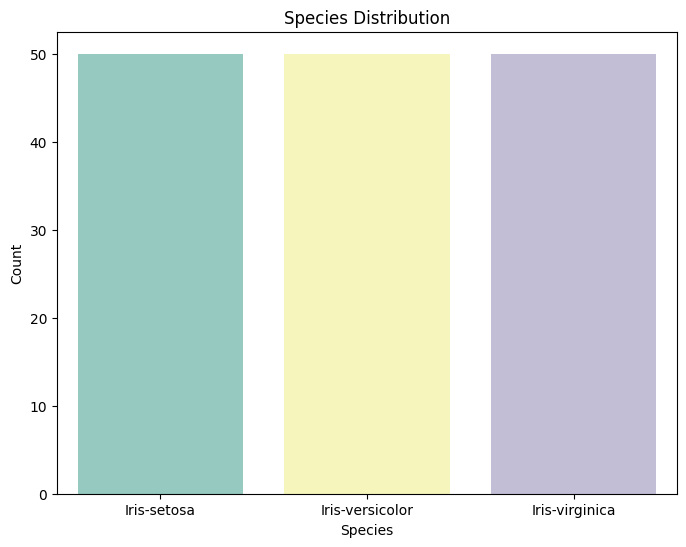

In [9]:
# Displaying the Bar plot of species distribution
species_counts = iris_data['species'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(
    x=species_counts.index,
    y=species_counts.values,
    hue=species_counts.index,
    palette="Set3",
    legend=False
)
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Species Distribution')
plt.show()

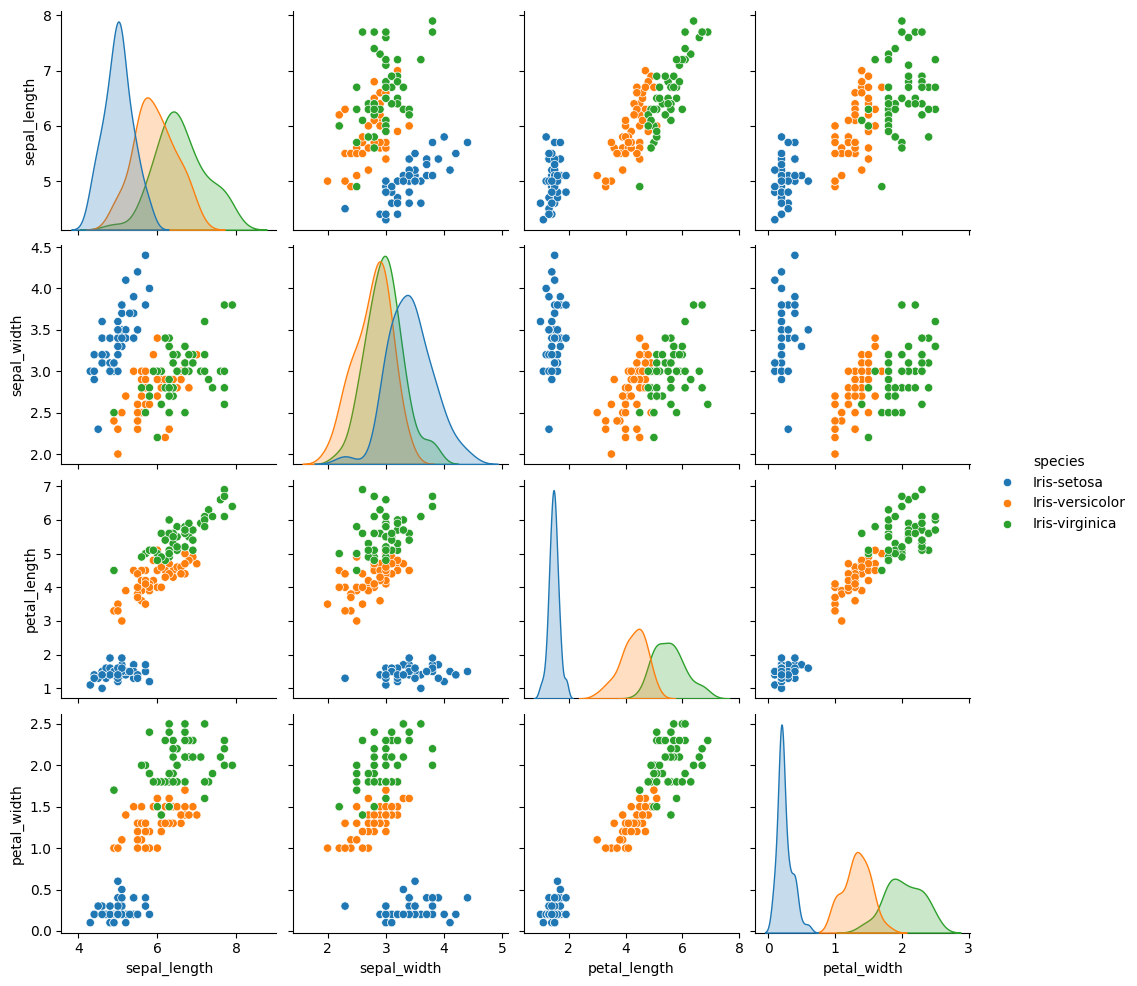

In [10]:
# Displaying the Pairplot to visualize relationships between features
sns.pairplot(iris_data, hue='species')
plt.show()

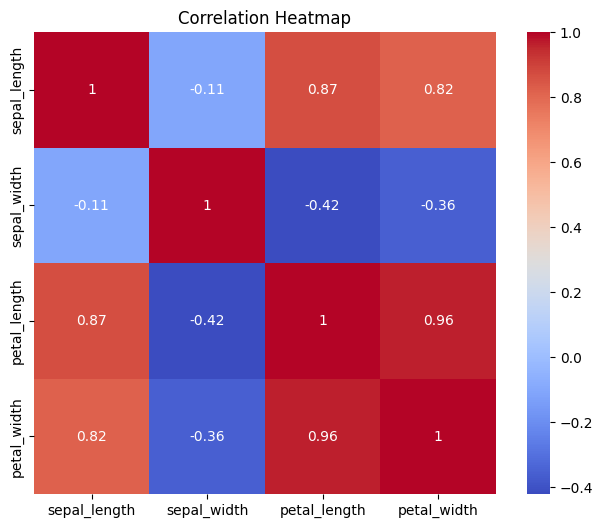

In [11]:
# Correlation matrix
corr_matrix = iris_data.select_dtypes(include='number').corr()

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


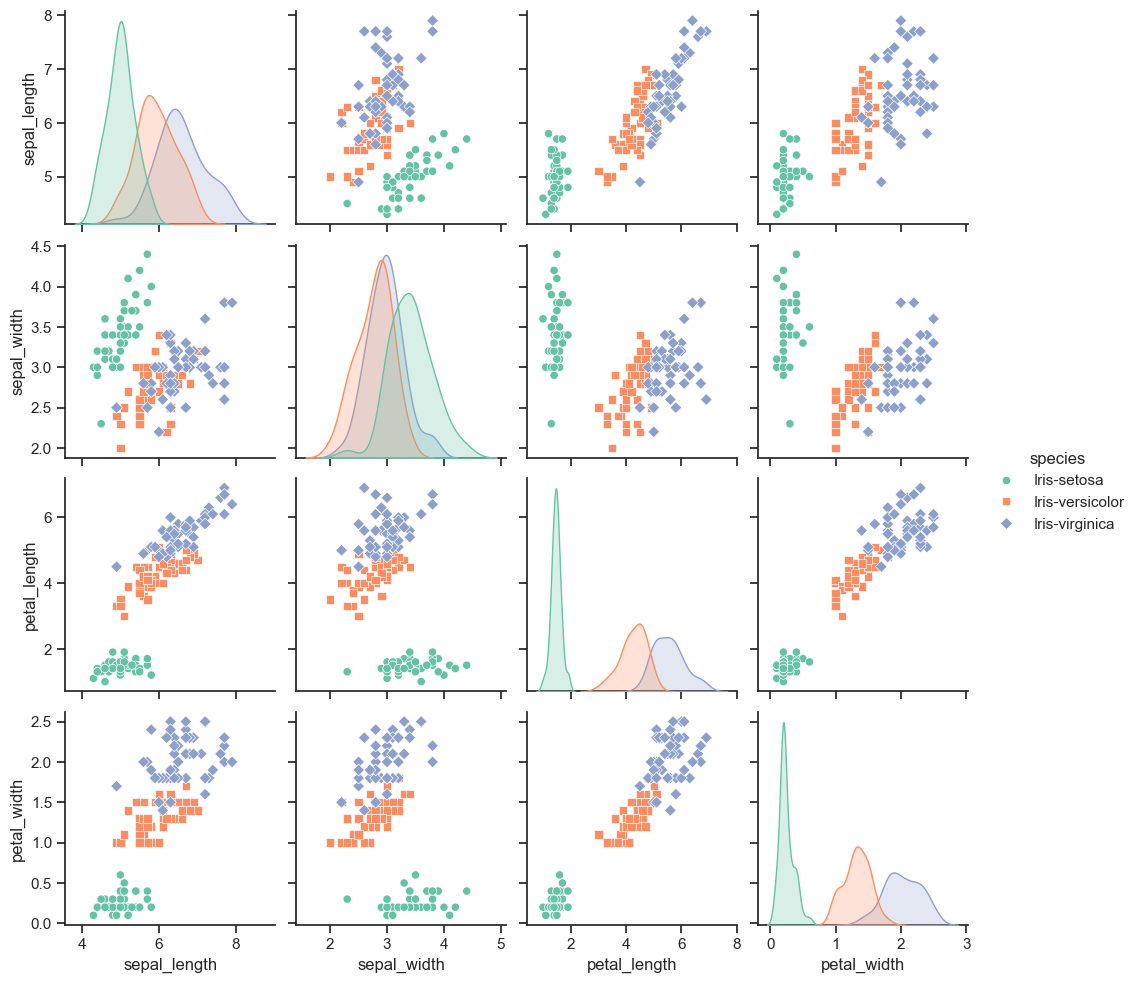

In [12]:
# Pairwise scatterplots colored by species
sns.set_theme(style="ticks")
sns.pairplot(iris_data, hue="species", markers=["o", "s", "D"], palette="Set2")
plt.show()

**Data Encoding**

In [13]:
# Encode the target column 'species'
labelencoder = LabelEncoder()
iris_data['species'] = labelencoder.fit_transform(iris_data['species'])

**Model Training**

In [14]:
# Splitting into training and testing datasets
X = iris_data.drop('species', axis=1)
y = iris_data['species']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Applying MinMax Scaling
scaling = MinMaxScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.fit_transform(X_test)

In [17]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


**Model Evaluation**

In [18]:
# Predicting on the test set
y_pred = model.predict(X_test)

In [19]:
# Calculating accuracy and its percentage
accuracy = accuracy_score(y_test, y_pred) * 100

# Displaying accuracy in percentage
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 100.00%


**Classification Report**

In [20]:
# Displaying classification report
report = classification_report(y_test, y_pred, target_names=labelencoder.classes_)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



**Confusion Matrix**

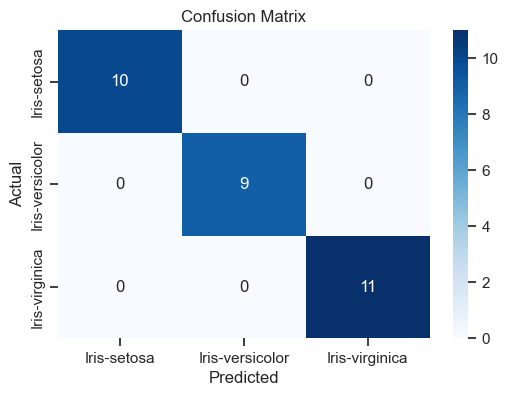

In [21]:
colors = ['#d0bad7', '#c5019c']

cmap = sns.color_palette(colors)

# Displaying a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labelencoder.classes_, yticklabels=labelencoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
